In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
# Build a dataframe with your connections
bess_association= pd.read_csv("Association_data_2.csv",engine='python')

In [24]:
bess_persona = bess_association[((bess_association.item_A.str.contains('xxspacexx')) |
                                (bess_association.item_B.str.contains('xxspacexx'))) & (bess_persona.freqAB > 5)]

In [26]:
bess_persona.head()

,Unnamed: 0,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
131,1932949,maryxxspacexxclementsxxspacexxladyxxspacexxlei...,annexxspacexxcaulfeildxxspacexxladyxxspacexxch...,6,0.036173,6,0.036173,6,0.036173,1.000000,1.000000,27.645000
132,1932901,maryxxspacexxclementsxxspacexxladyxxspacexxlei...,annexxspacexxcaulfeildxxspacexxladyxxspacexxch...,6,0.036173,6,0.036173,6,0.036173,1.000000,1.000000,27.645000
779,1363676,grisellxxspacexxbailliexxeosxxstageoflifexyzna...,grisell,6,0.036173,11,0.066317,7,0.042202,0.545455,0.857143,12.924935
780,1444318,henriettaxxspacexxstuartxxeosxxstageoflifexyzn...,guiche,7,0.042202,10,0.060288,9,0.054259,0.700000,0.777778,12.901000
1301,1646656,juliaxxspacexxselingxxspacexxinglisxxeosxxstag...,inglis,12,0.072346,12,0.072346,15,0.090432,1.000000,0.800000,11.058000


In [83]:
persona = 'lola montez'
from_vals = bess_association[(bess_association.item_A ==persona) | (bess_association.item_B == persona)].item_A.values[0:5]
to_vals = bess_association[(bess_association.item_A == persona) | (bess_association.item_B == persona)].item_B.values[0:5]

In [84]:
df = pd.DataFrame({ 'from':from_vals, 'to':to_vals, 'value': ['typeA', 'typeA', 'typeB', 'typeB','typeA']})
df

,from,to,value
0,lola montez,seekamp,typeA
1,lola montez,edward gilbert,typeA
2,abel,lola montez,typeB
3,lola montez,limerick,typeB
4,betty james,lola montez,typeA


In [85]:
# And I need to transform my categorical column in a numerical value typeA->1, typeB->2...
df['value']=pd.Categorical(df['value'])
df['value'].cat.codes

0    0
1    0
2    1
3    1
4    0
dtype: int8

In [86]:
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to',create_using=nx.Graph())

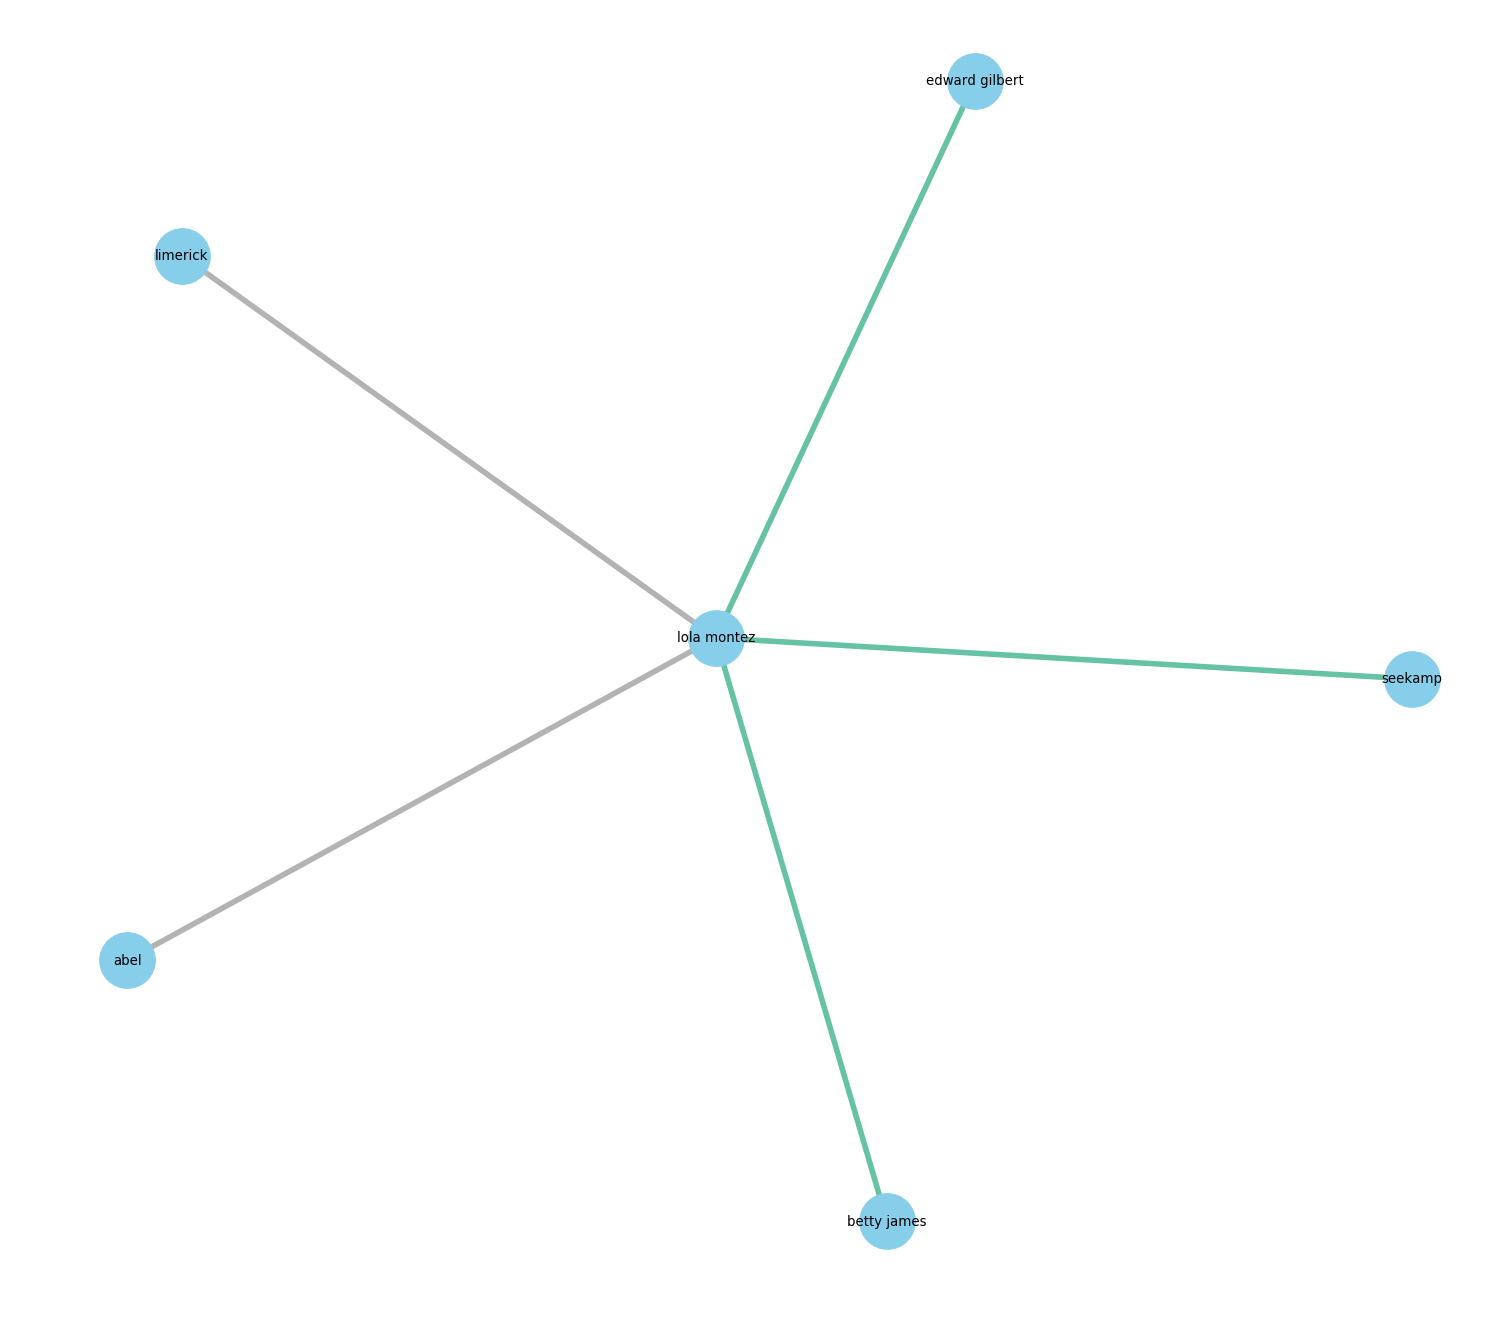

In [92]:
# Graph with Custom nodes:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#nx.draw(G, with_labels=True, node_size=2000, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=50)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2500,\
        edge_color=df['value'].cat.codes, width=5.0, edge_cmap=plt.cm.Set2)
plt.show()